In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os

Let's extract some basic stuff first 

1) the lda vectors

In [2]:
def extract_normed_lda_vectors_and_mags(directory: str):
    proj1_lda_norm = np.load(os.path.join(directory, "proj1_lda_norm.npy"))
    proj2_lda_norm = np.load(os.path.join(directory, "proj2_lda_norm.npy"))
    lda_norm_direction = np.load(os.path.join(directory, "lda_dir_norm.npy"))

    # divide the diff by the norm of the lda_norm_direction
    diffs = (proj1_lda_norm.mean(0) - proj2_lda_norm.mean(0)).squeeze()/np.linalg.norm(lda_norm_direction, axis=-1)
    
    return lda_norm_direction/np.linalg.norm(lda_norm_direction, axis=-1, keepdims=True), diffs

lda_norm_direction, diff_mags = extract_normed_lda_vectors_and_mags(directory="/workspace/reasoning_vector_research/reasoning_resid_comparisons/comparison_1_body_base_reasoning_vs_base_answering_math")

lda_norm_direction_boosted, diff_mags_boosted = extract_normed_lda_vectors_and_mags(directory="/workspace/reasoning_vector_research/reasoning_resid_comparisons/comparison_2_body_reasoning_boosted_reasoning_vs_reasoning_boosted_answering_math")


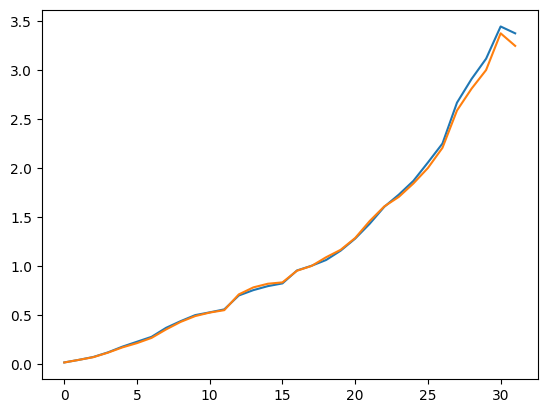

In [3]:
plt.plot(diff_mags)
plt.plot(diff_mags_boosted)

In [4]:
def cosine_similarity(a, b):
    """ 
    compute the cosine similarity of a and b along the final dimension
    """
    return (a*b).sum(-1) / (np.linalg.norm(a, axis=-1) * np.linalg.norm(b, axis=-1))

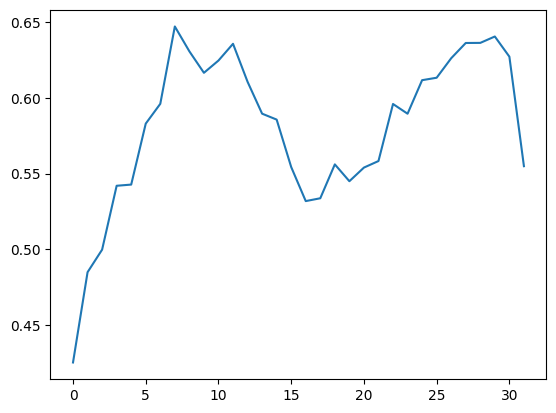

In [5]:
# plot coside similarities of lda_norm_direction and lda_norm_direction_boosted
plt.plot(cosine_similarity(lda_norm_direction, lda_norm_direction_boosted))


In [6]:
def plot_head_histogram(arr1: np.ndarray, arr2: np.ndarray, head_idx: int, bins: int = 30):
    """
    Plot overlapping histograms for a selected head index from two arrays.

    Args:
        arr1 (np.ndarray): First array of shape (N1, 32, 1).
        arr2 (np.ndarray): Second array of shape (N2, 32, 1).
        head_idx (int): Index in [0, 31] specifying which head to plot.
        bins (int): Number of bins for the histogram (default: 30).
    """
    # Extract the values for the given head index
    values1 = arr1[:, head_idx, 0]
    values2 = arr2[:, head_idx, 0]
    
    # Determine common bin edges to align both histograms
    all_values = np.concatenate([values1, values2])
    bin_edges = np.histogram_bin_edges(all_values, bins=bins)
    
    plt.figure(figsize=(8, 6))
    plt.hist(values1, bins=bin_edges, color='red', alpha=0.5, label='Array 1')
    plt.hist(values2, bins=bin_edges, color='blue', alpha=0.5, label='Array 2')
    
    plt.title(f"Head {head_idx}: Overlapping Distributions")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [7]:
proj_lda_1 = np.load("reasoning_resid_comparisons/comparison_0_body_base_answering_vs_reasoning_boosted_reasoning_math/proj1_lda_norm.npy")
proj_lda_2 = np.load("reasoning_resid_comparisons/comparison_0_body_base_answering_vs_reasoning_boosted_reasoning_math/proj2_lda_norm.npy")
w_vectors_lda = np.load("reasoning_resid_comparisons/comparison_0_body_base_answering_vs_reasoning_boosted_reasoning_math/lda_dir_norm.npy")

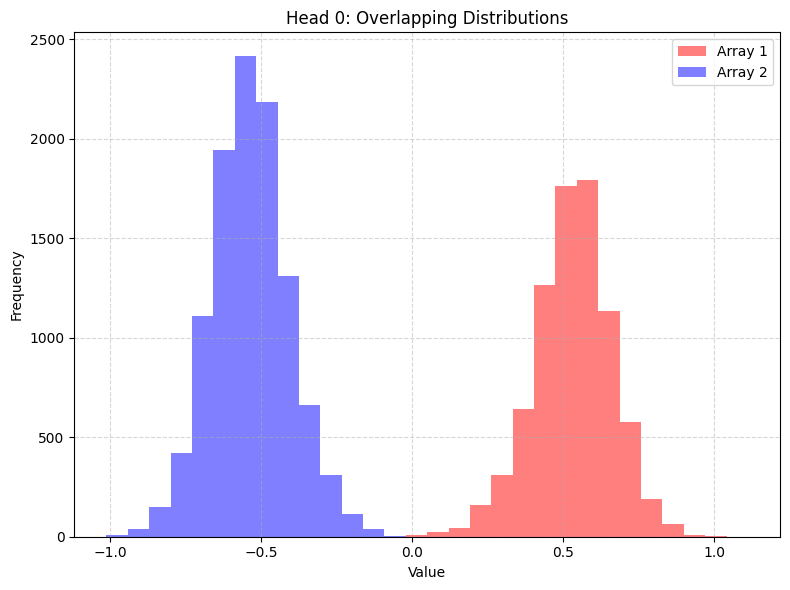

In [8]:
plot_head_histogram(
    arr1=proj_lda_1/np.linalg.norm(w_vectors_lda, -1, keepdims=True), 
    arr2=proj_lda_2/np.linalg.norm(w_vectors_lda, -1, keepdims=True), 
    head_idx=0, 
    bins=30
)

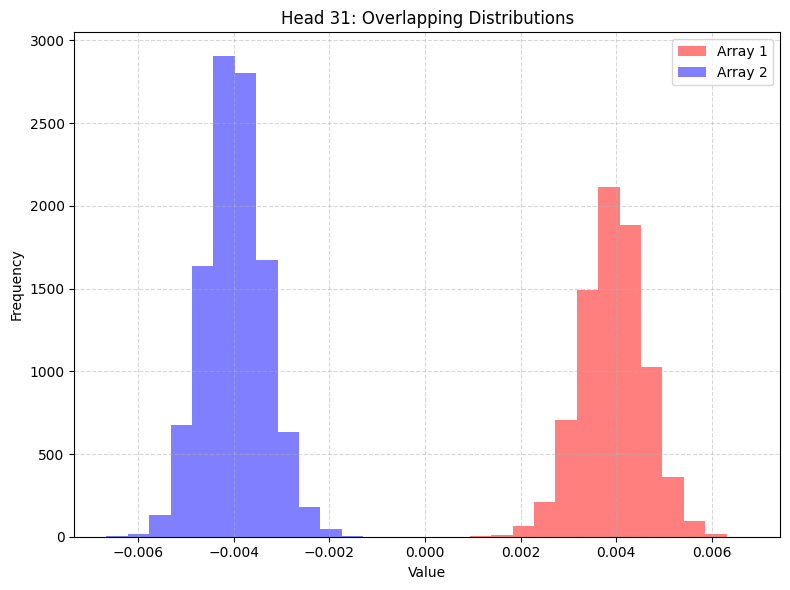

In [9]:
plot_head_histogram(arr1=proj_lda_1, arr2=proj_lda_2, head_idx=31, bins=30)

In [13]:
proj_mean_diff_1 = np.load("reasoning_resid_comparisons/comparison_0_body_base_answering_vs_reasoning_boosted_reasoning_math/proj1_mean_diff_norm.npy")
proj_mean_diff_2 = np.load("reasoning_resid_comparisons/comparison_0_body_base_answering_vs_reasoning_boosted_reasoning_math/proj2_mean_diff_norm.npy")
mean_diff_vectors = np.load("reasoning_resid_comparisons/comparison_0_body_base_answering_vs_reasoning_boosted_reasoning_math/mean_diff_norm.npy")

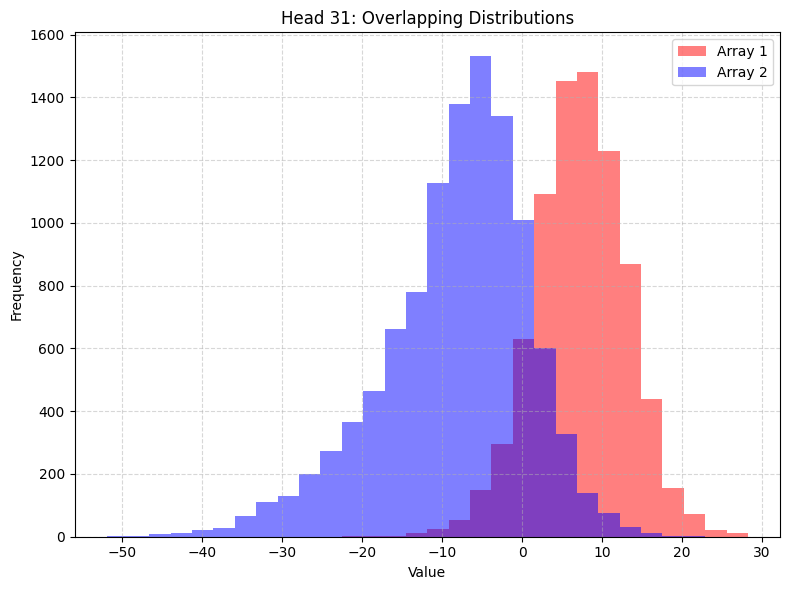

In [14]:
plot_head_histogram(arr1=proj_lda_1/np.linalg.norm(mean_diff_vectors, axis=-1, keepdims=True), 
                    arr2=proj_lda_2/np.linalg.norm(mean_diff_vectors, axis=-1, keepdims=True), head_idx=31, bins=30)

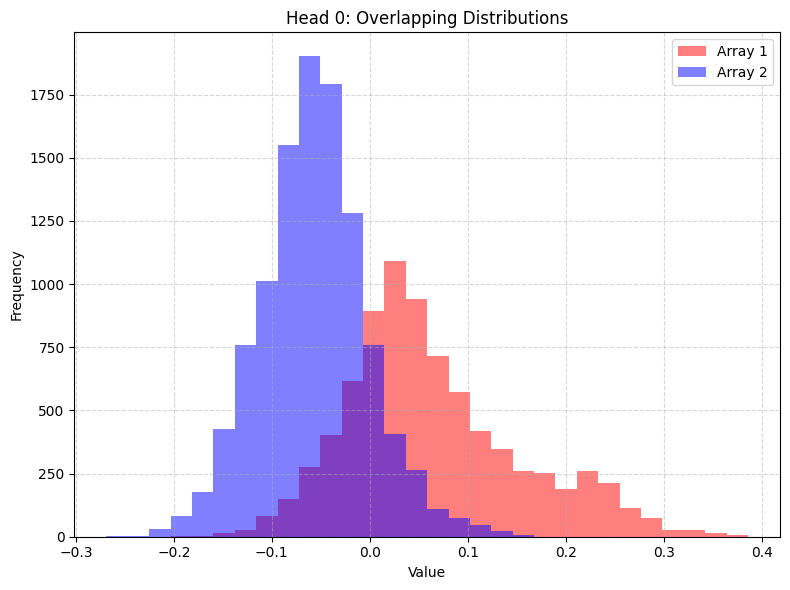

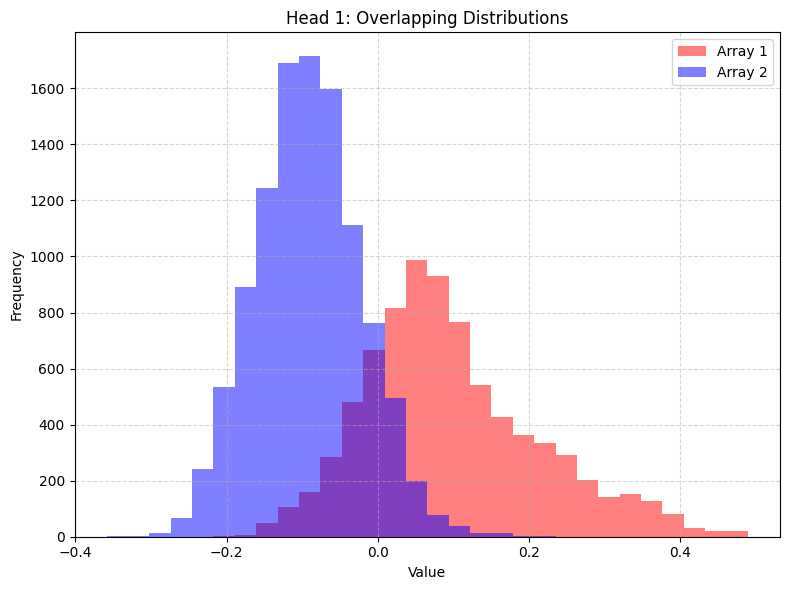

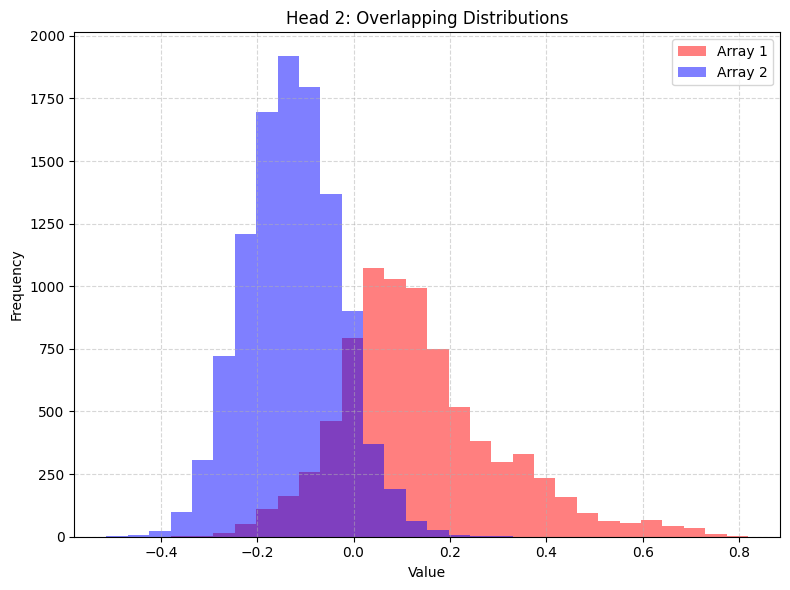

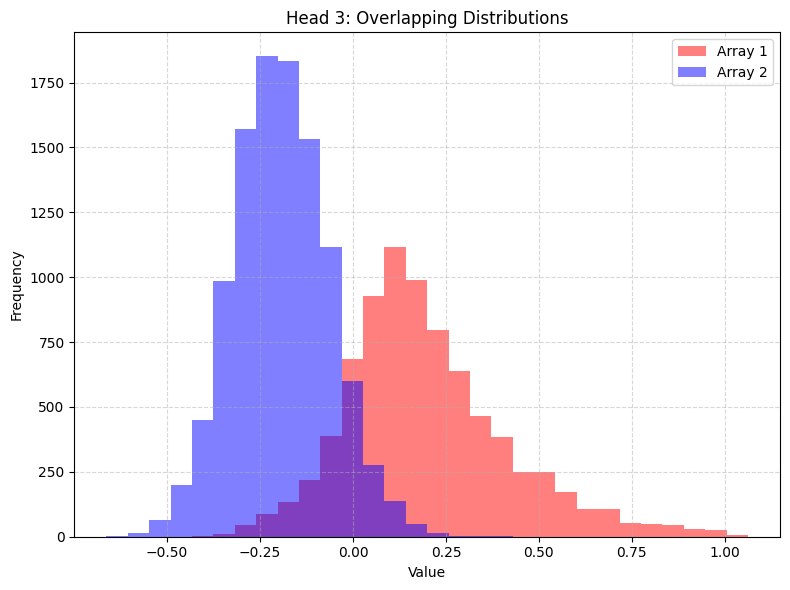

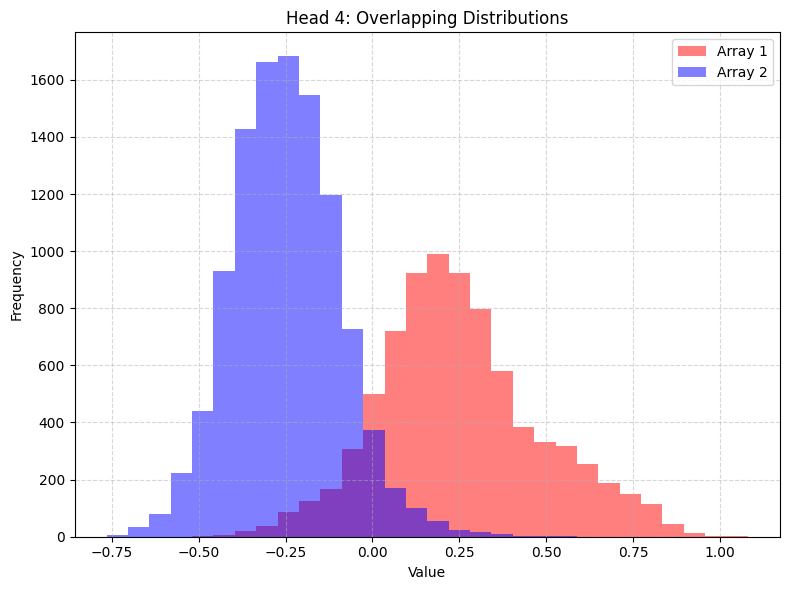

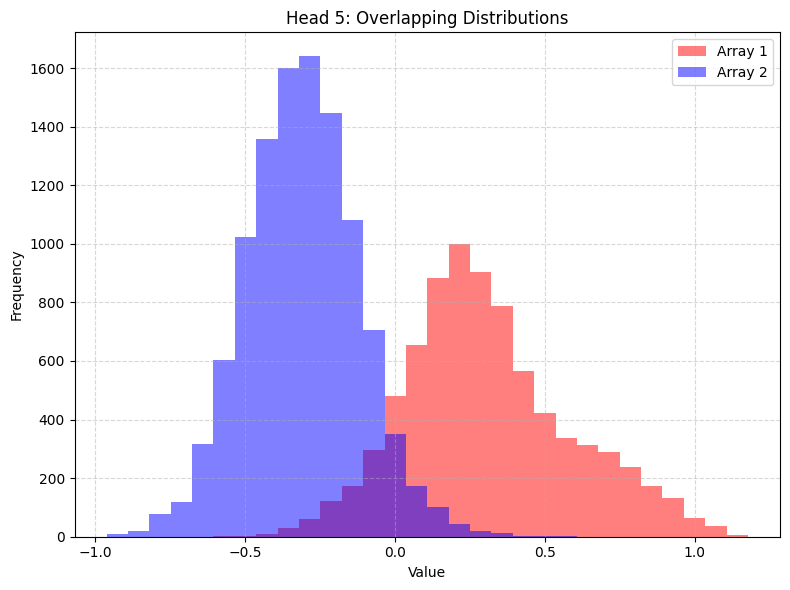

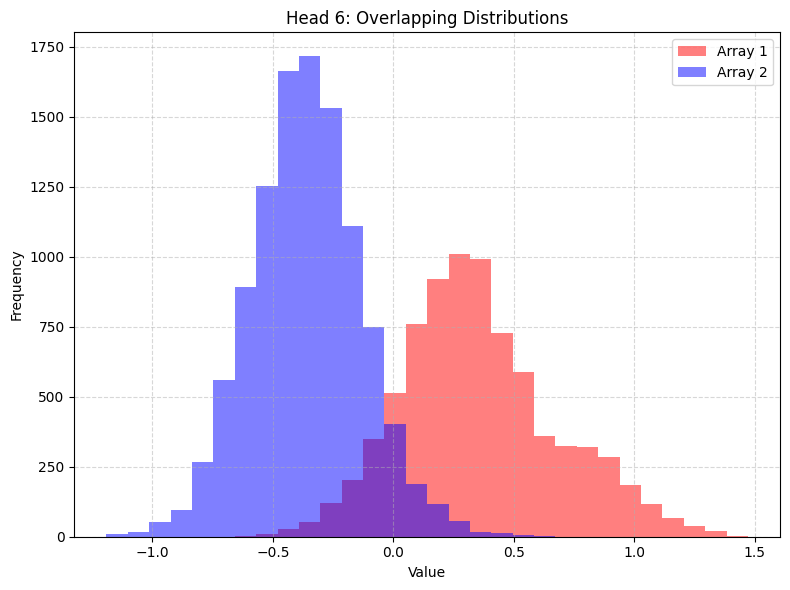

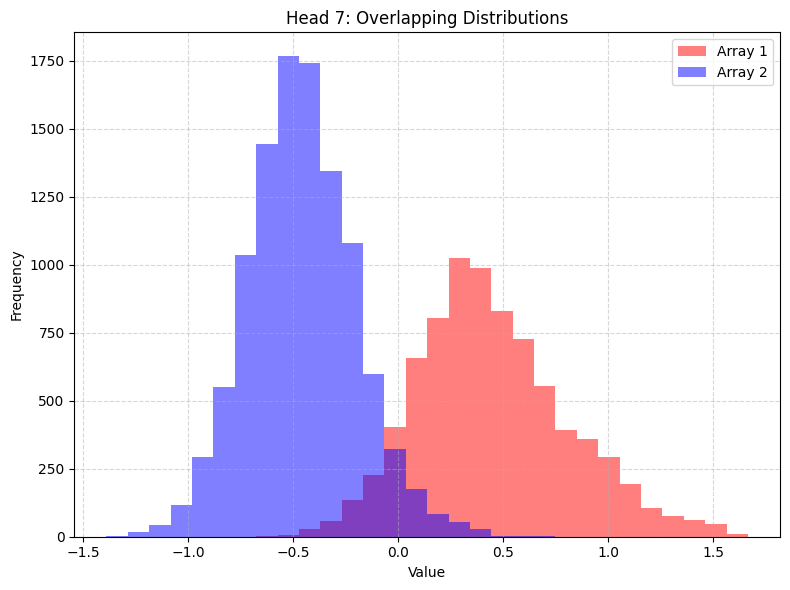

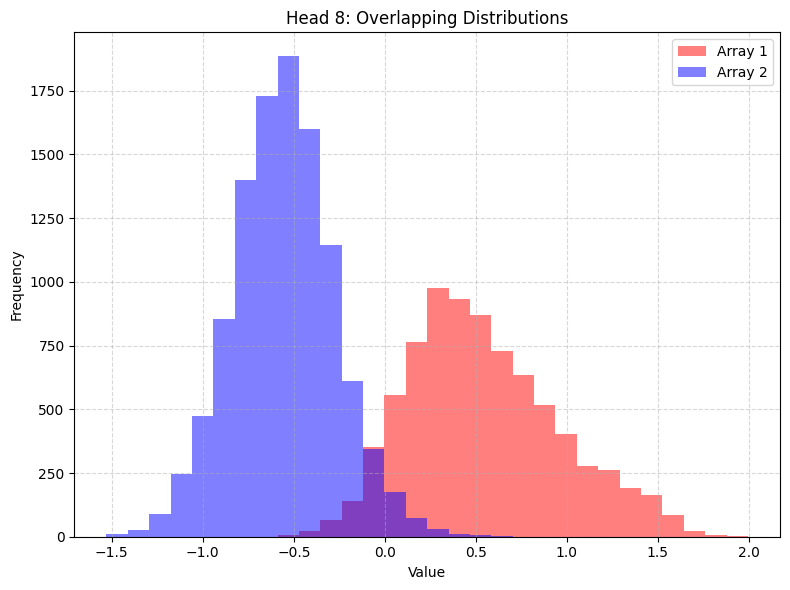

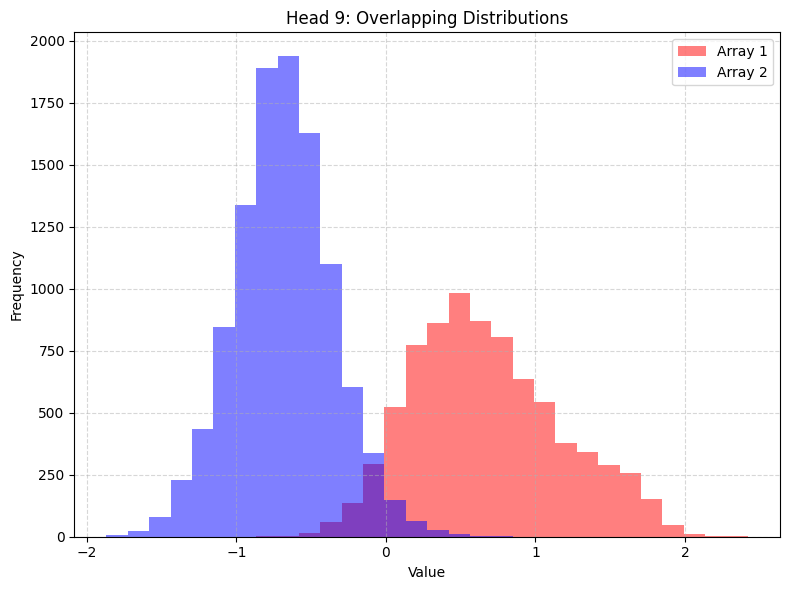

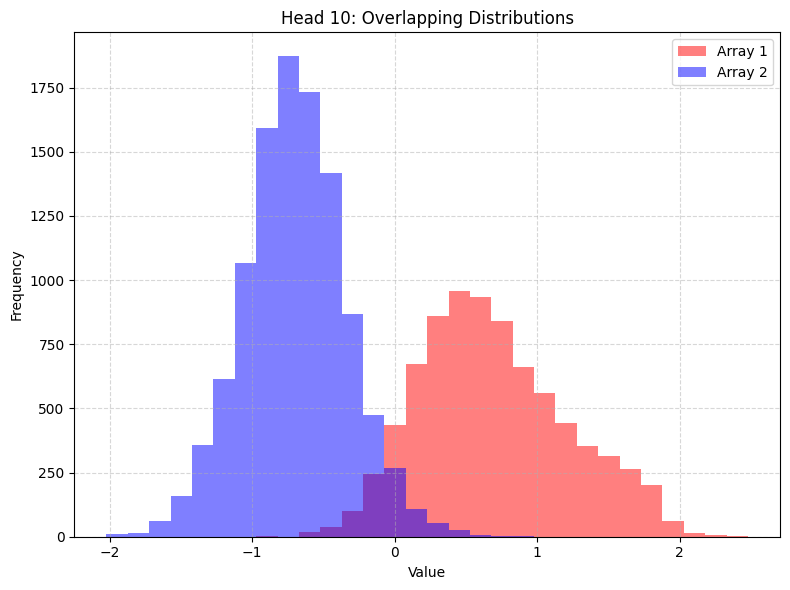

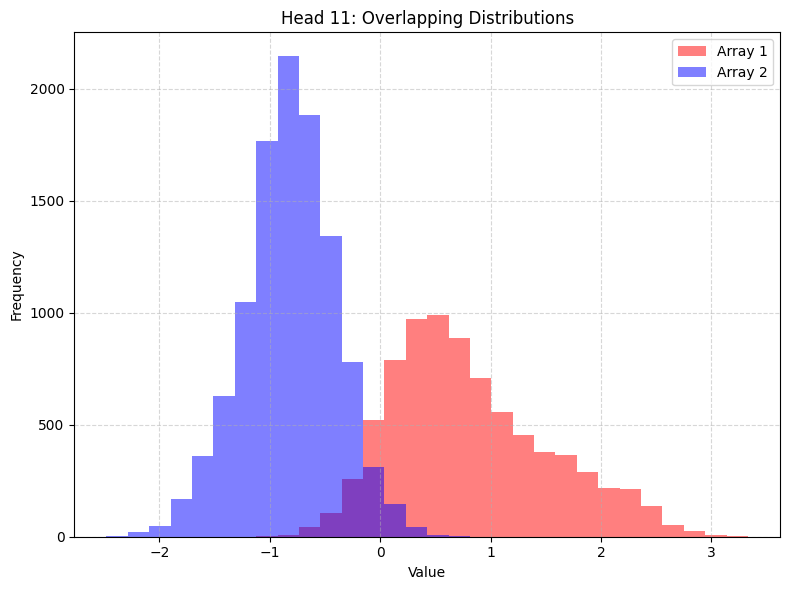

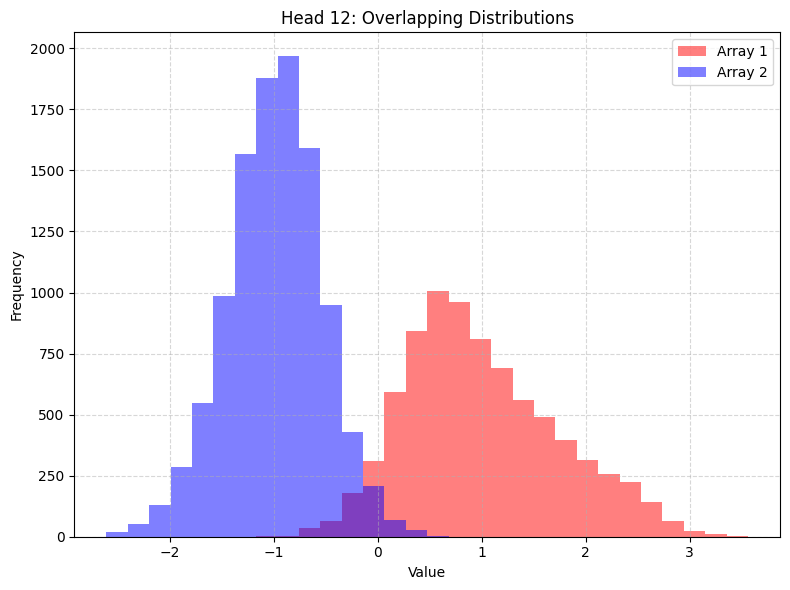

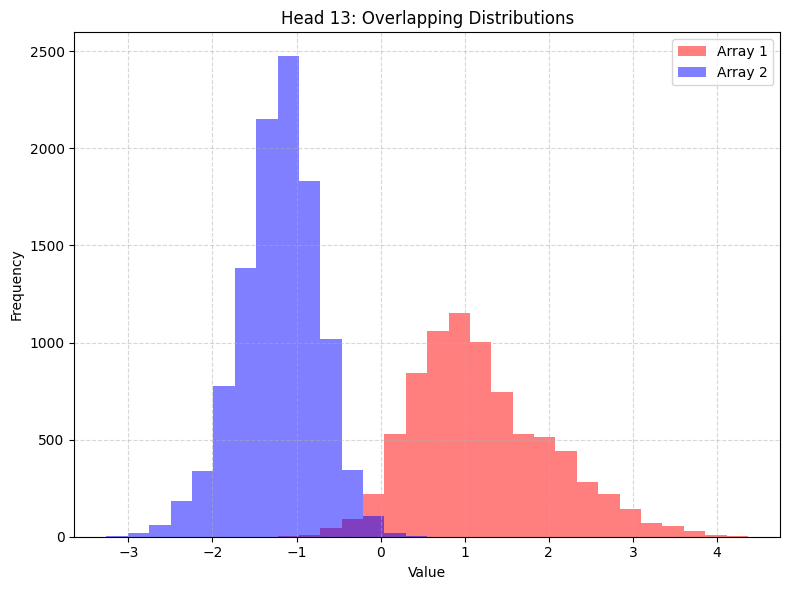

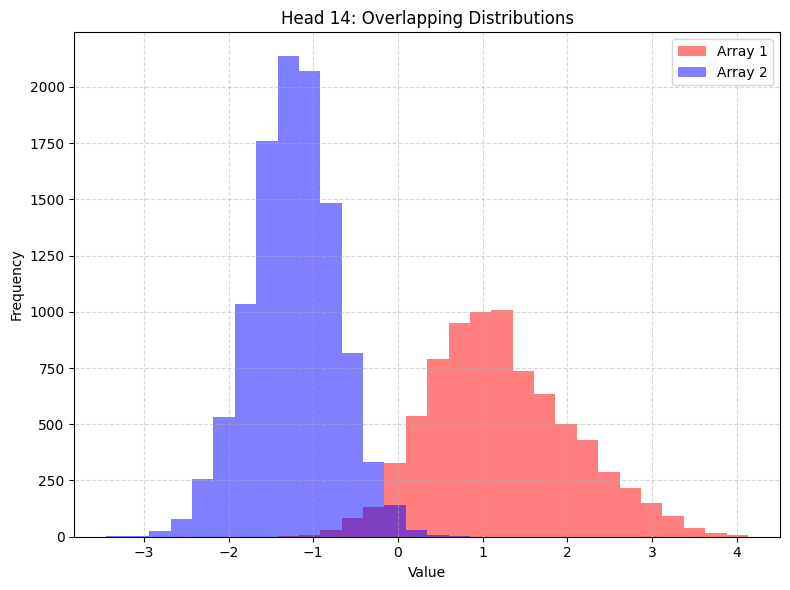

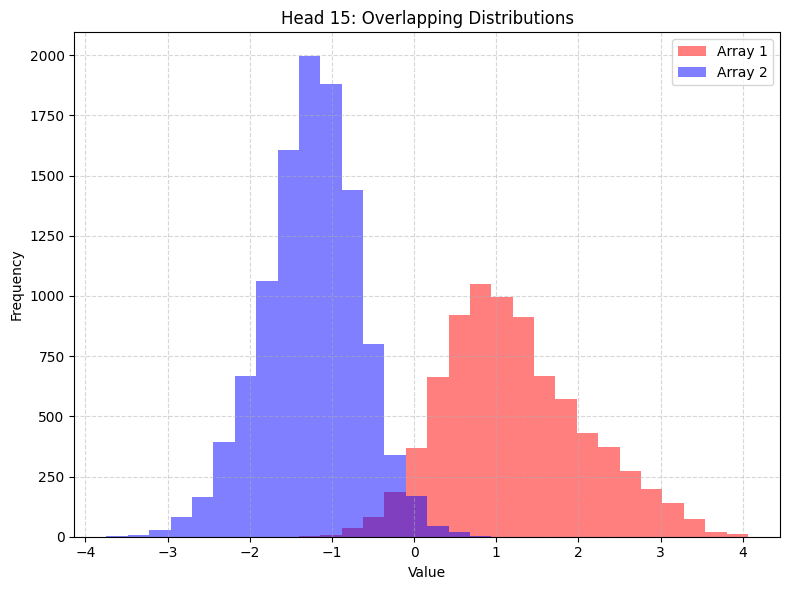

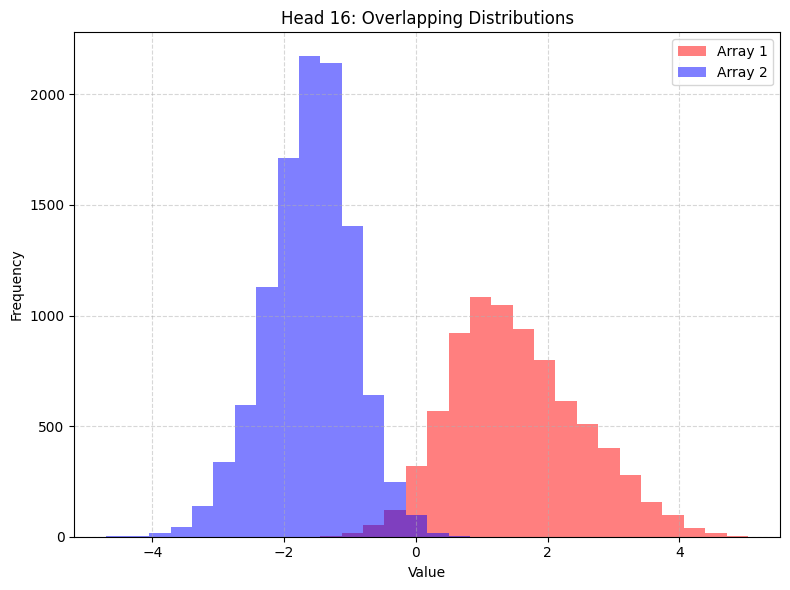

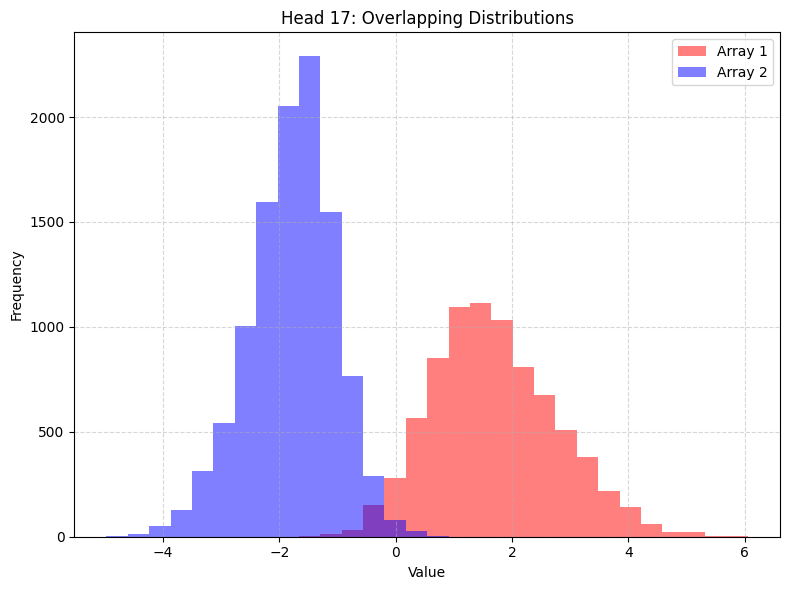

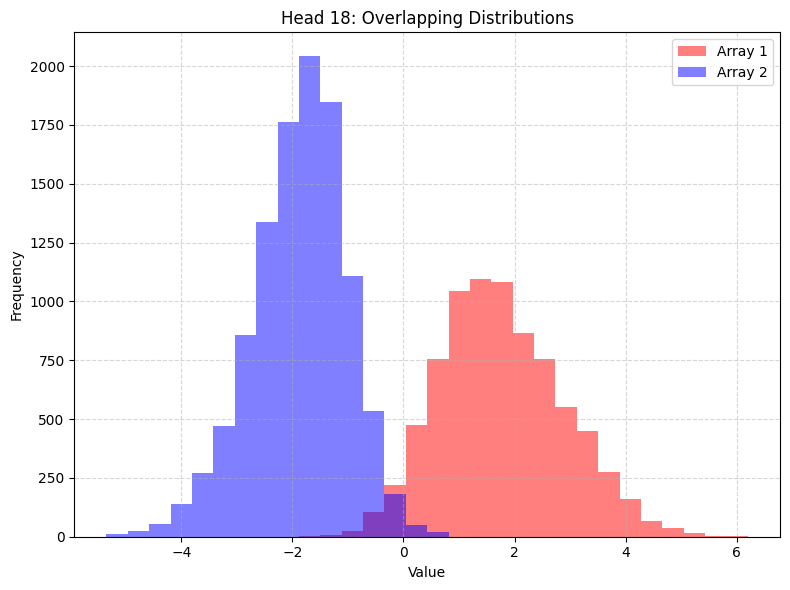

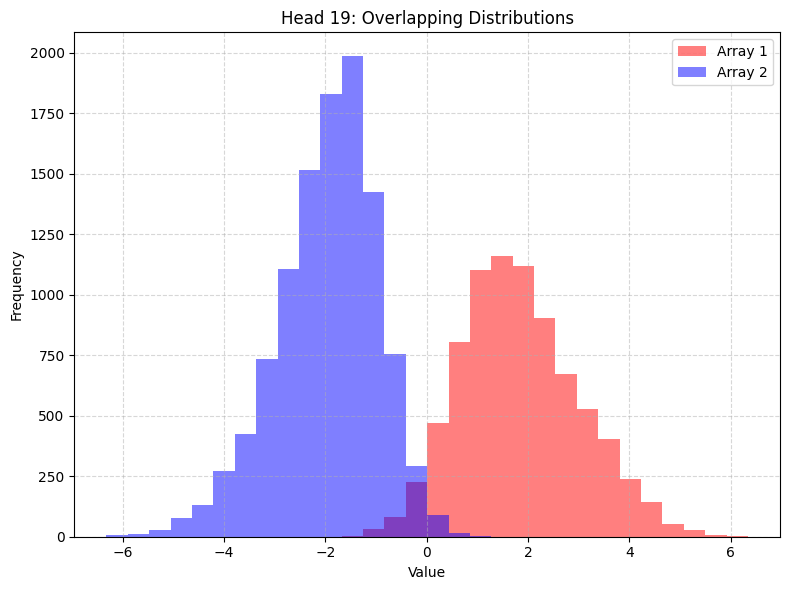

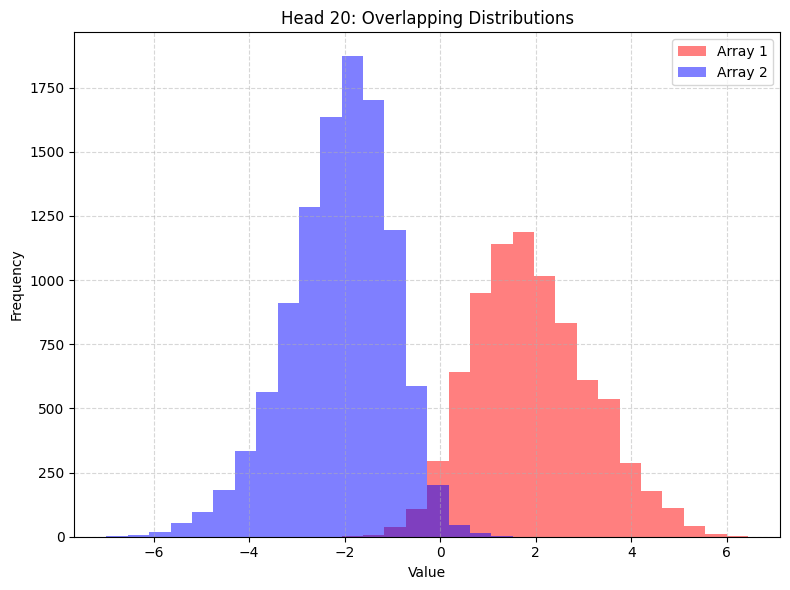

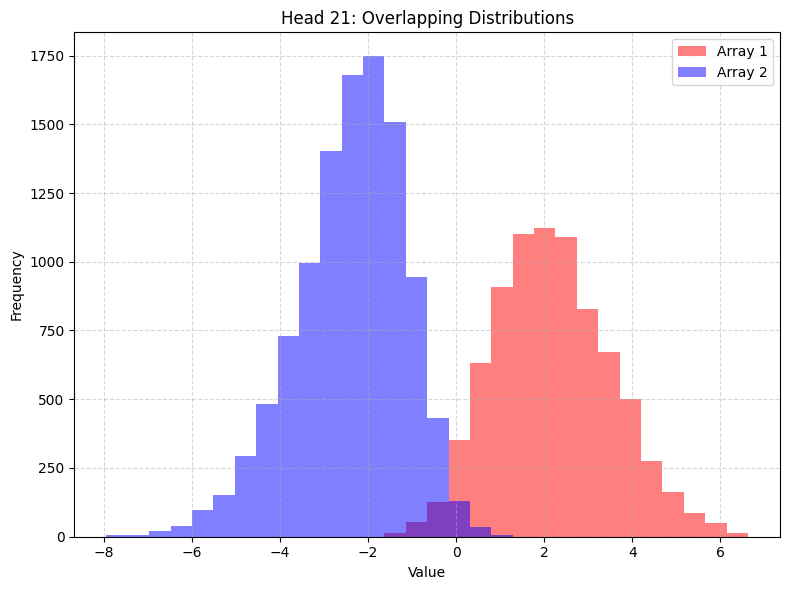

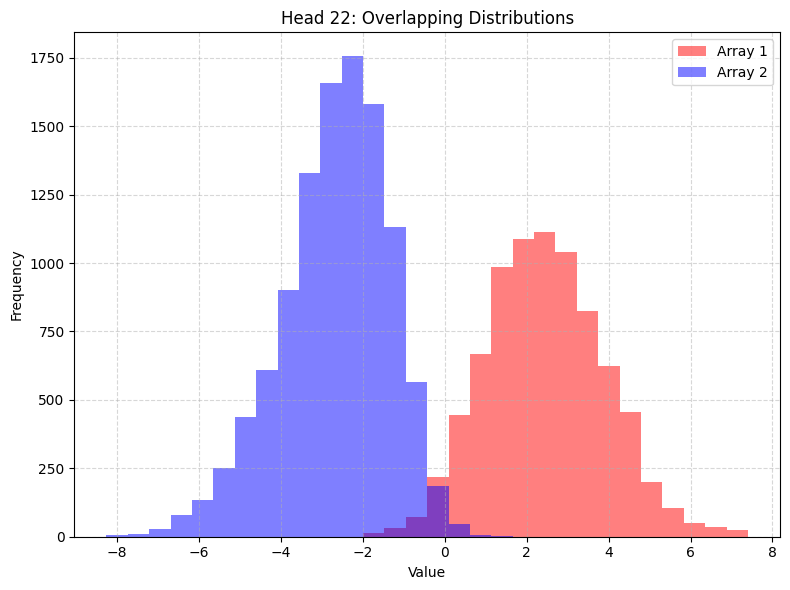

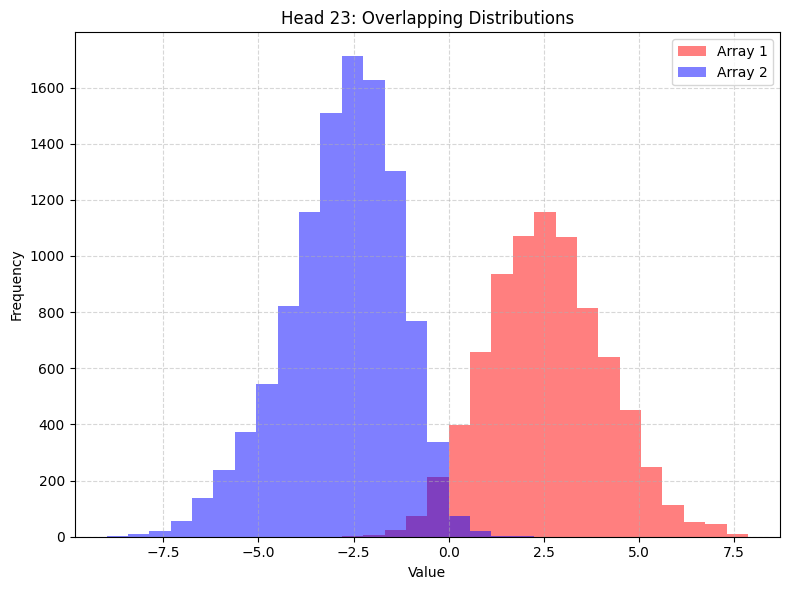

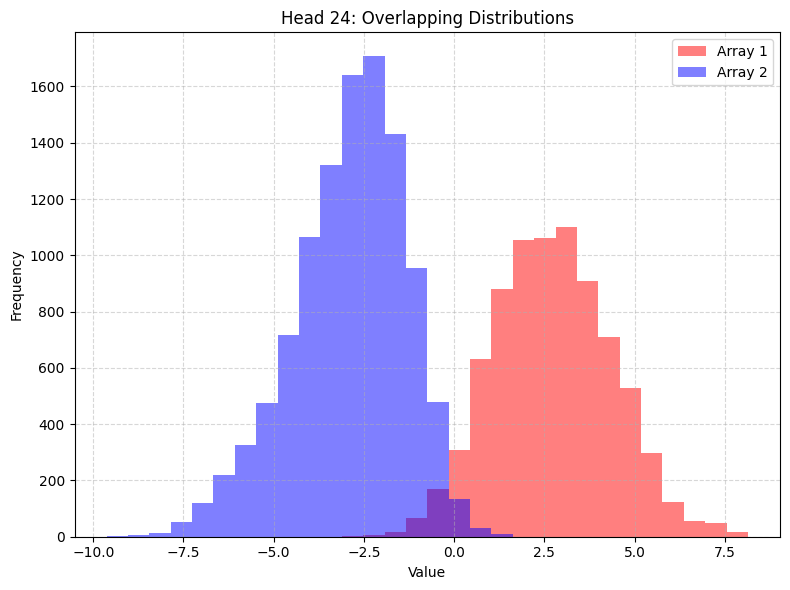

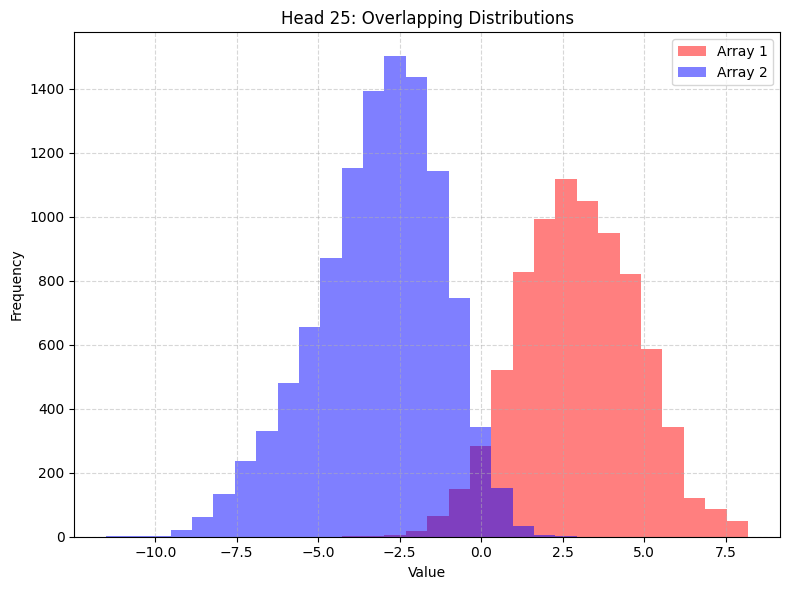

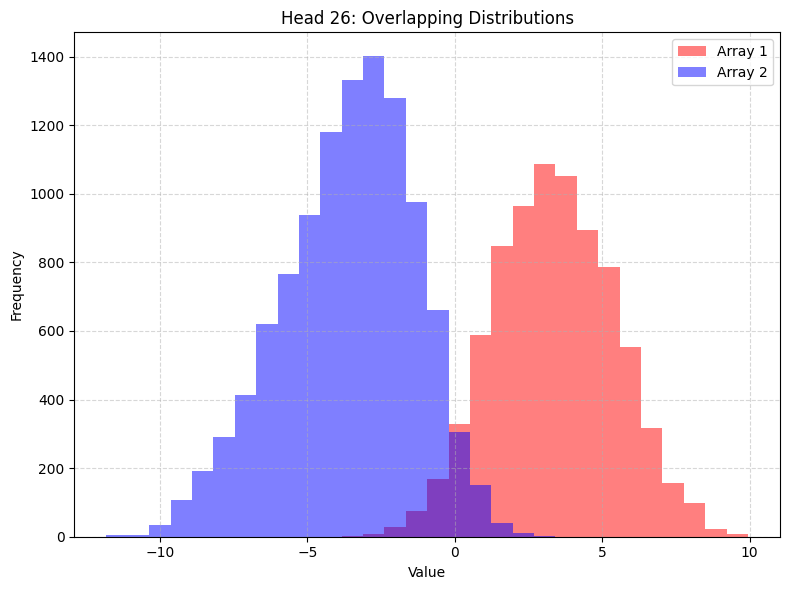

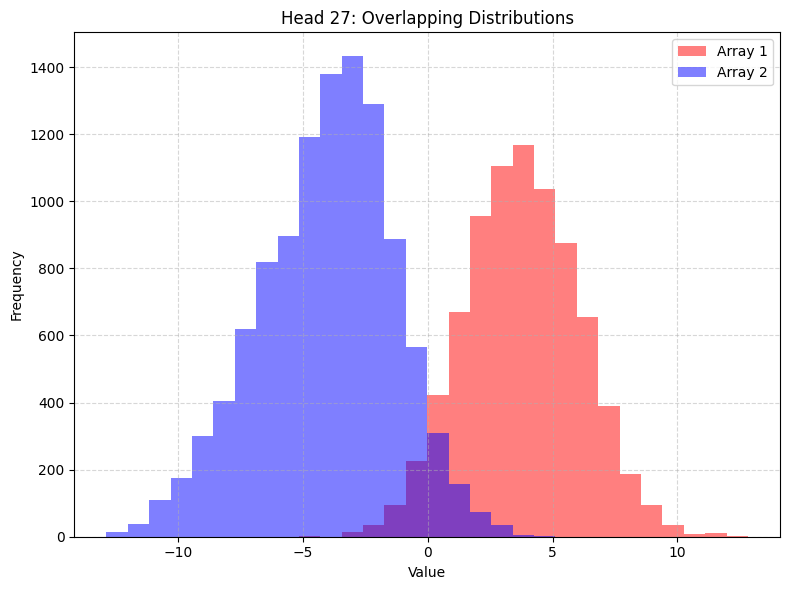

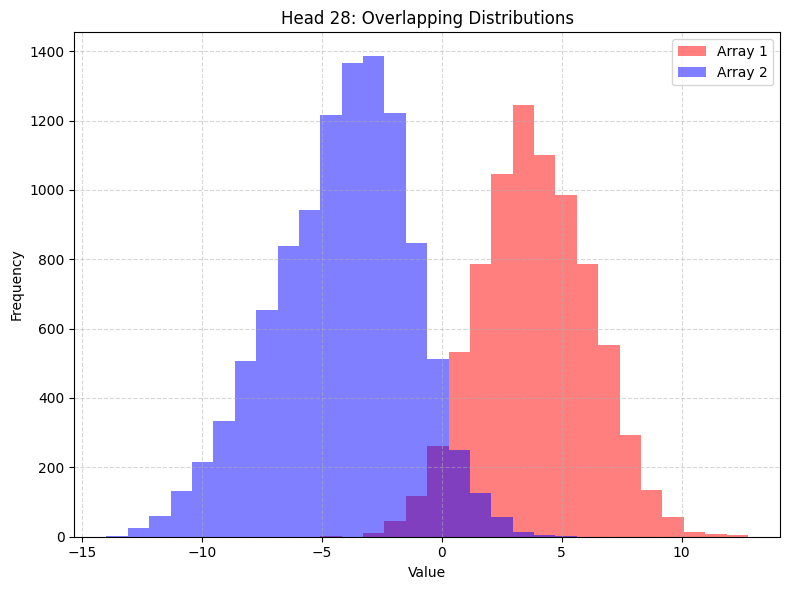

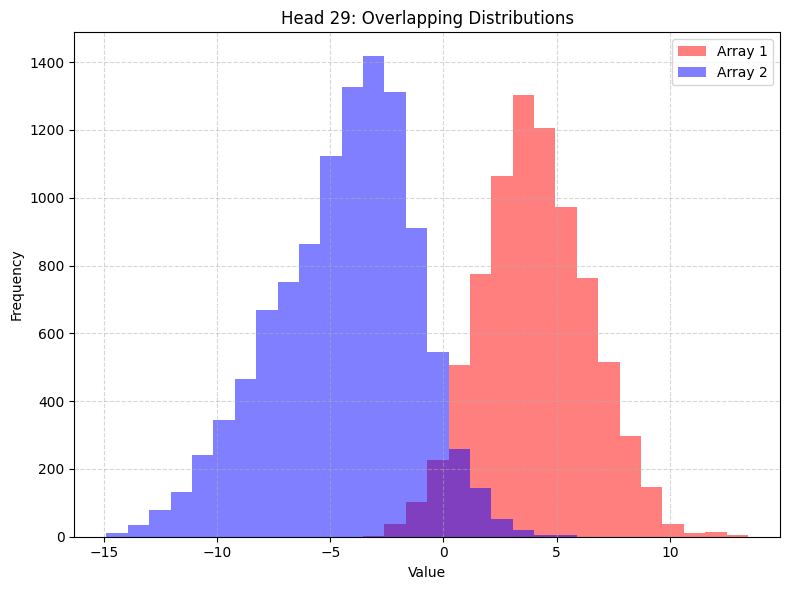

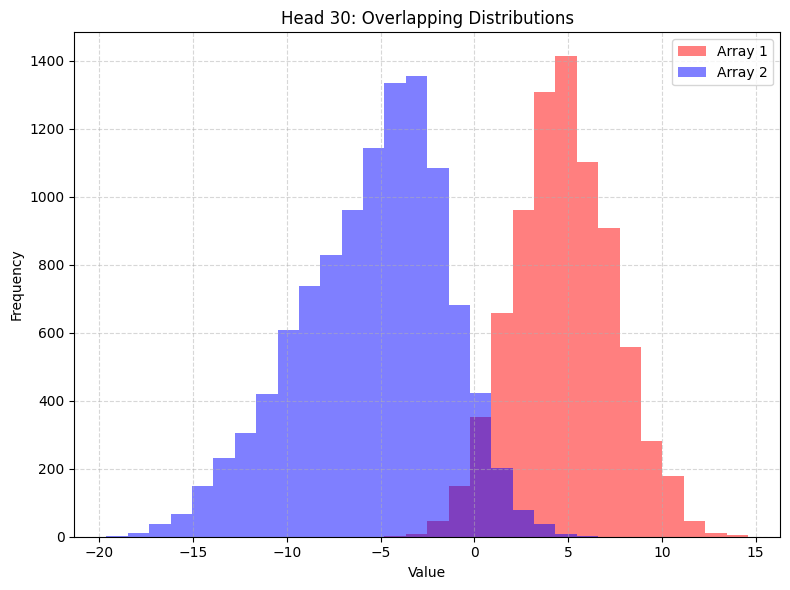

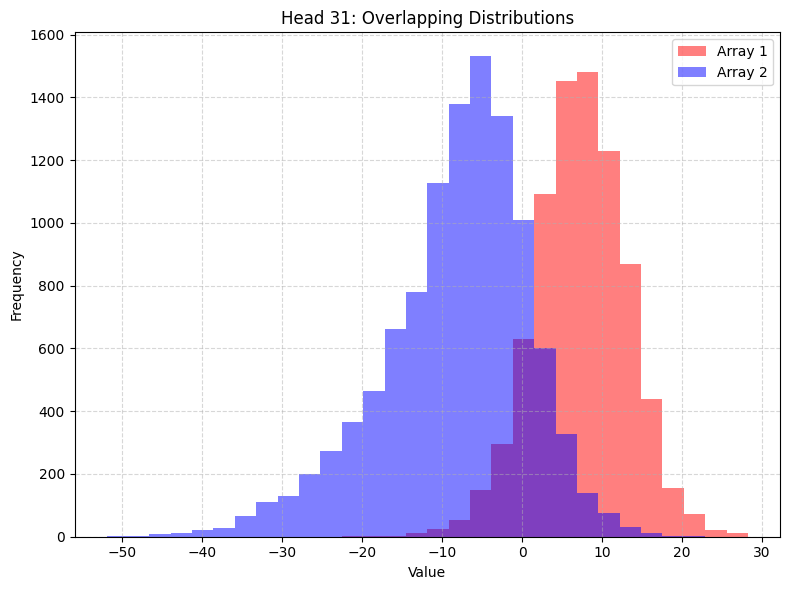

In [15]:
for l in range(32):
    plot_head_histogram(
        arr1=proj_lda_1/np.linalg.norm(mean_diff_vectors, axis=-1, keepdims=True), 
        arr2=proj_lda_2/np.linalg.norm(mean_diff_vectors, axis=-1, keepdims=True), head_idx=l, bins=30)